<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/Titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"pson2809","key":"f045f4a4adb9707f5c86d18bc28608b2"}'}

In [14]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Dec 26 12:02 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
# List available datasets.
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
mehdidag/black-friday                                         Black Friday                                          5MB  2018-07-25 20:49:48          22673  
spscientist/students-performance-in-exams                     Students Performance in Exams                         8KB  2018-11-09 18:25:25           7856  
szamil/who-suicide-statistics                                 WHO Suicide Statistics                              307KB  2018-08-29 21:23:11           5736  
lava18/google-play-store-apps                                 Google Play Store Apps                                2MB  2018-09-18 20:49:49          28307  
nguyenhoc/plane-crash                               

In [18]:
# Copy the stackoverflow data set locally.
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!sudo pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [24]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender =  pd.read_csv('gender_submission.csv')

X = training
y = training.Survived

feature_train = X.drop(['Name','PassengerId'],axis = 1)
gioitinh= {'male':0,'female':1}
feature_train.Sex.replace(gioitinh,inplace = True)

embarked = {'S':1,'C':2,'Q':3}
feature_train.Embarked.replace(embarked,inplace = True)
feature_train.Embarked.fillna(0,inplace = True)

feature_train['Family'] = feature_train.SibSp  + feature_train.Parch
feature_train.Family.loc[feature_train.Family > 0] =1 
feature_train.Family.loc[feature_train.Family == 0] = 0 

feature_train.Age.fillna(0,inplace = True)

feature_train.Cabin.fillna("X",inplace = True)
feature_train.Cabin = [i[0] for i in feature_train.Cabin]
s = feature_train.Cabin.sort_values().unique()
label = pd.factorize(s)

feature_train.Cabin = feature_train.Cabin.replace(label[1],label[0])
X = feature_train.drop(['Ticket','SibSp','Parch'],axis= 1)

X_train,X_val,y_train,y_val = train_test_split(X,y)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
X.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,0,22.0,7.2500,8,1.0,1
1,1,1,1,38.0,71.2833,2,2.0,1
2,1,3,1,26.0,7.9250,8,1.0,0
3,1,1,1,35.0,53.1000,2,1.0,1
4,0,3,0,35.0,8.0500,8,1.0,0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


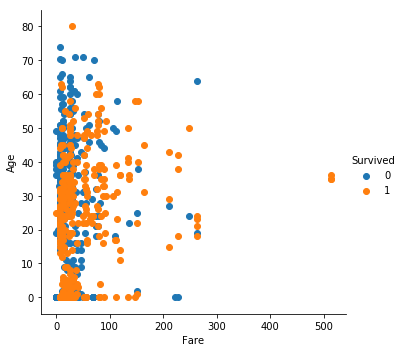

In [38]:
import seaborn as sns
sns.FacetGrid(X, hue = 'Survived', size = 5).map(plt.scatter,'Fare','Age').add_legend()
plt.show()

In [41]:
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.figure()
sns.boxplot(x="Fare", y="Age", data=dataset )
plt.show()


NameError: ignored

In [22]:
test.head()
X_test = test
feature_test = X_test.drop(['Name','PassengerId'],axis = 1)

gioitinh= {'male':0,'female':1}
feature_test.Sex.replace(gioitinh,inplace = True)

embarked = {'S':0,'C':1,'Q':2}
feature_test.Embarked.replace(embarked,inplace= True)


feature_test['Family'] = feature_test.SibSp  + feature_train.Parch
feature_test.Family.loc[feature_test.Family > 0] =1 
feature_test.Family.loc[feature_test.Family == 0] = 0 

feature_test.Age.fillna(0,inplace = True)

feature_test.Cabin.fillna('X',inplace = True)
feature_test.Cabin = [i[0] for i in feature_test.Cabin]
h = feature_test.Cabin.sort_values().unique()
label = pd.factorize(h)
feature_test.Cabin = feature_test.Cabin.replace(label[1],label[0])

feature_test.Fare.fillna(0,inplace = True)
feature_test = feature_test.drop(['SibSp','Parch','Ticket'],axis = 1 )
X_test = feature_test
y_test = gender.Survived

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_validate
print(X_train.shape)
print(y_train.shape)

model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
loss = mean_squared_error(y_test,pred)
print('Mean Squared Error: ', loss)
score = r2_score(y_test,pred)
print('Variabel accuracy: %.2f',score)
# vals = cross_validate(model,X_val,y_val,)
# print('val_score', vals)

(668, 7)
(668,)
Mean Squared Error:  0.06892984070391245
Variabel accuracy: %.2f 0.7021246169580926


In [12]:
a = y_train.reshape(-1,1)
a.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(668, 1)